# **Image Processing**


In [ ]:
# Installation (If isn't installed)
!pip install opencv-python matplotlib

In [3]:
# Libraries Neccesaries
import cv2
import matplotlib.pyplot as plt

In [7]:
# --> Put path of the file of interest
image_path = "Image Useful\IMG_3735.jpg" # IMG_3735 is the name of file
image = cv2.imread(image_path)

<>:2: SyntaxWarning: invalid escape sequence '\I'
<>:2: SyntaxWarning: invalid escape sequence '\I'
C:\Users\AlexisBenitez\AppData\Local\Temp\ipykernel_9892\1956225233.py:2: SyntaxWarning: invalid escape sequence '\I'
  image_path = "Image Useful\IMG_3735.jpg" # IMG_3735 is the name of file


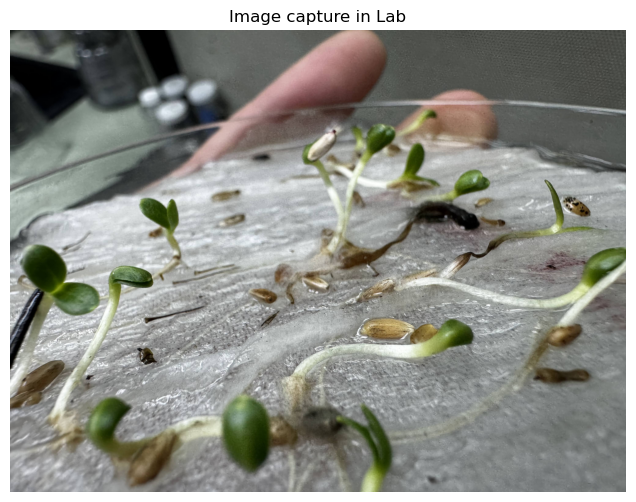

In [6]:
# Verify if the image load correctly

if image is None:
    print("Error: Not posible load the image, verify path")
else:
    
    # Become the image of BGR (OpenCV format) To RGB (matplotlib format)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Show the image using matplotlib
    plt.figure(figsize=(8, 6))
    plt.imshow(image_rgb)
    plt.title("Image capture in Lab")
    plt.axis("off")
    plt.show()

### **Capture and visualization in real time of video**

In [4]:
# Start with capture of video (0 for prestablish camera, 1,2.. if you have installed other)
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("It's not posible open web cam")
else:
    while True:
        # Capture frame by frame
        ret, frame = cap.read()
        
        if not ret:
            print("It's not posible load frame")
            break
            
        # Show the result frame
        cv2.imshow('Frame CCTV', frame)
        
        # Out of Cam 'q'
        if cv2.waitKey(1) == ord('q'):
            break
            
    # Release capture oject and close window
    
    cap.release()
    cv2.destroyAllWindows()

### **Loading a video**

In [5]:

# Path video
path_video = "Video Useful\store-aisle-detection.mp4"

# Load video
cap = cv2.VideoCapture(path_video)

if not cap.isOpened():
    print("Error: It can't open cam.")
else:
    while True:
        # Capture frame by frame
        ret, frame = cap.read()
        if not ret:
            print("Error: It can't read the frame.")
            break

        # Show the frame on window 'Frame de CCTV'
        cv2.imshow("Frame de CCTV", frame)

        # Wait 1 ms to detect if someone type 'q' to out
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Release capture oject and close window
    
    cap.release()
    cv2.destroyAllWindows()



<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
C:\Users\AlexisBenitez\AppData\Local\Temp\ipykernel_25400\3147235001.py:2: SyntaxWarning: invalid escape sequence '\s'
  path_video = "Video Useful\store-aisle-detection.mp4"


Error: It can't read the frame.


## Image Enhancement, Correction, and Annotation Techniques

Optimize the visual quality of images captured by CCTV cameras and apply annotations that facilitate the identification of critical events.

#### Adjust brightness and contrast

In [6]:
# Load CCTV Image

image_path = "Image Useful\IMG_3735.jpg"
image = cv2.imread(image_path)
if image is None:
    print("Error: It can't open the image.")
    exit()

# adjust brightness and constrast : new_image = image * alpha + beta
alpha = 1.2  # Contrast factor (Major >1 increase contrast)
beta = 30    # Brightness value (Positive increase the brightness)
adjusted = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

<>:3: SyntaxWarning: invalid escape sequence '\I'
<>:3: SyntaxWarning: invalid escape sequence '\I'
C:\Users\AlexisBenitez\AppData\Local\Temp\ipykernel_25400\2357399365.py:3: SyntaxWarning: invalid escape sequence '\I'
  image_path = "Image Useful\IMG_3735.jpg"


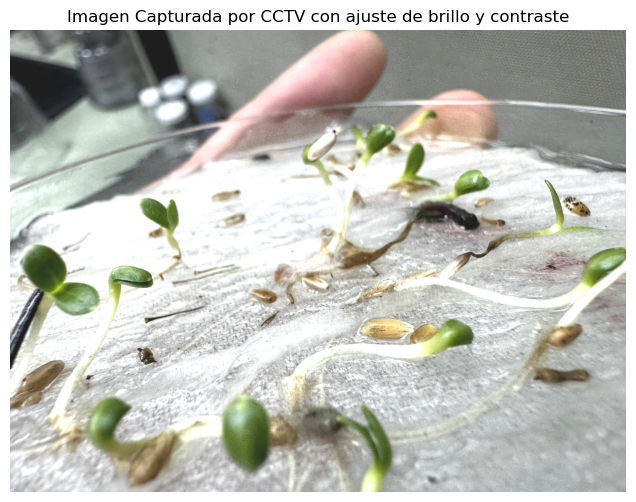

In [7]:
# Convertir la imagen de BGR (formato OpenCV) a RGB (formato matplotlib)
adjusted = cv2.cvtColor(adjusted, cv2.COLOR_BGR2RGB)

# Mostrar la imagen usando matplotlib
plt.figure(figsize=(8, 6))
plt.imshow(adjusted)
plt.title("Imagen Capturada por CCTV con ajuste de brillo y contraste")
plt.axis("off")
plt.show()

In [8]:
#Save image for comparisons
output_file = "Save Images/plants_image_con_correcciones.jpg"
cv2.imwrite(output_file, adjusted)

True

#### Corrección de color y normalización

In [9]:
import numpy as np

The HSV (Hue, Saturation, Value) color space represents colors according to their hue, saturation, and value.
Converting an image to HSV makes it easier to manipulate saturation, allowing you to adjust the intensity or purity of colors without affecting their brightness or hue.

In [10]:
# Convert the adjusted image to HSV space to modify the saturation
hsv = cv2.cvtColor(adjusted, cv2.COLOR_BGR2HSV)

In [11]:
h, s, v = cv2.split(hsv)

# Increase Saturation 
saturacion = 5

s = cv2.multiply(s, saturacion)  
s = np.clip(s, 0, 255).astype(np.uint8)
hsv_adjusted = cv2.merge([h, s, v])
color_corrected = cv2.cvtColor(hsv_adjusted, cv2.COLOR_HSV2BGR)

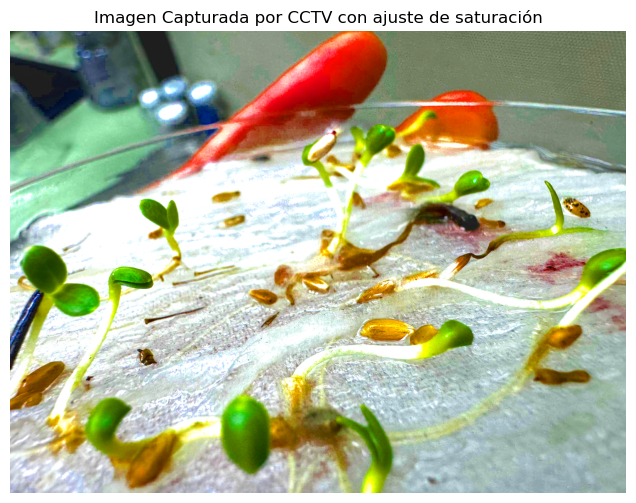

In [ ]:
# Show the image using Matplotlib 
plt.figure(figsize=(8, 6))
plt.imshow(color_corrected)
plt.title("Image captured by CCTV with saturation adjustment")
plt.axis("off")
plt.show()

In [13]:
# Convert BGR image (OpenCV format) to RGB (matplotlib format)
color_corrected = cv2.cvtColor(color_corrected, cv2.COLOR_BGR2RGB)

# Save image for comparisons
output_file = "Save Images/plants_image_with_corrections_of_saturation.jpg"
cv2.imwrite(output_file, color_corrected)



True

#### Application of annotations
We draw the box depends on dimension of the original image

In [23]:
# Make a copy of an already uploaded image
annotated = image.copy()


# Draw a line: from (150,250) to (350,250) in blue BGR: (255, 0, 0) with line thickness 3 pixels
cv2.line(annotated, (150, 250), (350, 250), (255, 0, 0), 3)

# Draw a rectangle: top left corner (150, 300), bottom right (350,600) in green BGR: (0, 255, 0)
cv2.rectangle(annotated, (150, 300), (350, 600), (0, 255, 0), 3)

# Write text: 'Person' in red BGR: (0, 0, 255), located at (200,290)
cv2.putText(annotated, 'Plant', (200, 290), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)



array([[[ 23,  27,  22],
        [ 23,  27,  22],
        [ 23,  27,  22],
        ...,
        [ 74,  79,  78],
        [ 78,  83,  82],
        [ 67,  72,  71]],

       [[ 23,  27,  22],
        [ 23,  27,  22],
        [ 23,  27,  22],
        ...,
        [ 74,  79,  78],
        [ 79,  84,  83],
        [ 68,  73,  72]],

       [[ 23,  27,  22],
        [ 23,  27,  22],
        [ 23,  27,  22],
        ...,
        [ 75,  80,  79],
        [ 79,  84,  83],
        [ 68,  73,  72]],

       ...,

       [[153, 148, 147],
        [153, 148, 147],
        [152, 147, 146],
        ...,
        [114, 115, 111],
        [112, 113, 109],
        [ 95,  96,  92]],

       [[152, 147, 146],
        [152, 147, 146],
        [151, 146, 145],
        ...,
        [114, 115, 111],
        [112, 113, 109],
        [ 95,  96,  92]],

       [[152, 147, 146],
        [151, 146, 145],
        [151, 146, 145],
        ...,
        [114, 115, 111],
        [112, 113, 109],
        [ 95,  96,  92]]

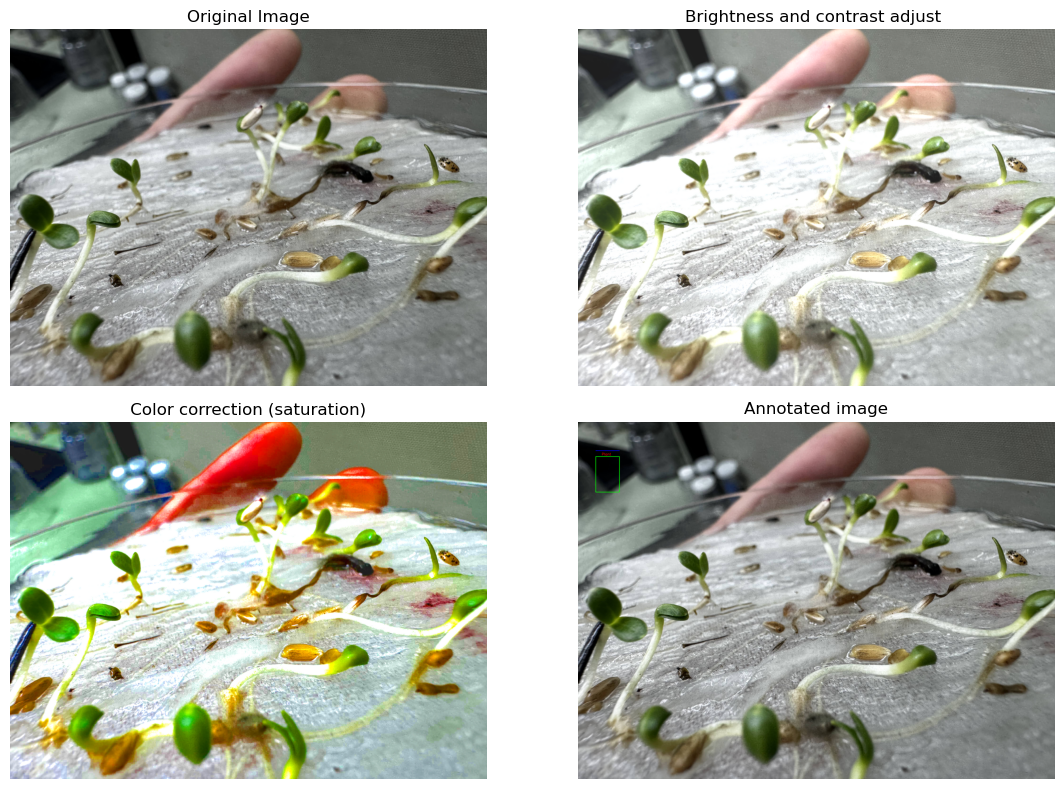

In [24]:
# Convert from BGR to RGB for visualization with matplotlib

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
adjusted_rgb = adjusted
color_corrected_rgb = cv2.cvtColor(color_corrected, cv2.COLOR_BGR2RGB)
annotated_rgb = cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.imshow(adjusted_rgb)
plt.title("Brightness and contrast adjust ")
plt.axis("off")

plt.subplot(2, 2, 3)
plt.imshow(color_corrected_rgb)
plt.title(" Color correction (saturation) ")
plt.axis("off")

plt.subplot(2, 2, 4)
plt.imshow(annotated_rgb)
plt.title("Annotated image")
plt.axis("off")

plt.tight_layout()
plt.show()